In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install pycaret

In [5]:
from pycaret.datasets import get_data
data= get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


In [6]:
df= get_data('pokemon')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
df.shape

(800, 13)

In [8]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [10]:
df['Type 1'].value_counts()

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

<Axes: xlabel='Generation', ylabel='Total'>

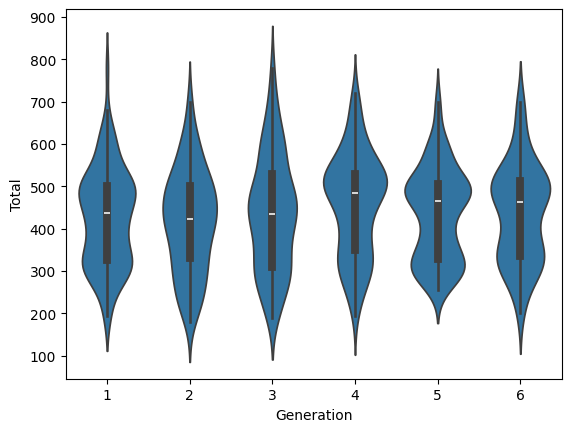

In [11]:
sns.violinplot(x='Generation', y='Total', data=df)

<Axes: xlabel='Generation', ylabel='HP'>

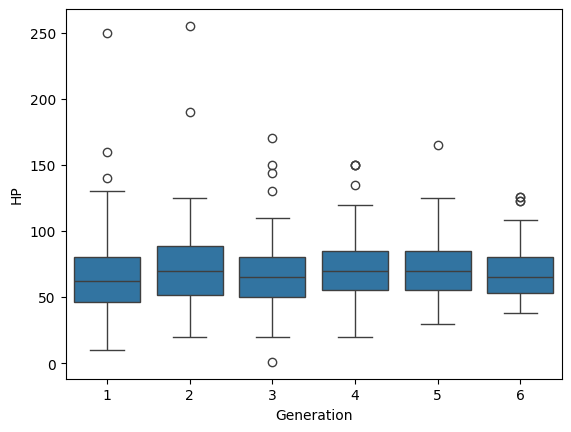

In [12]:
sns.boxplot(x='Generation', y='HP', data=df)

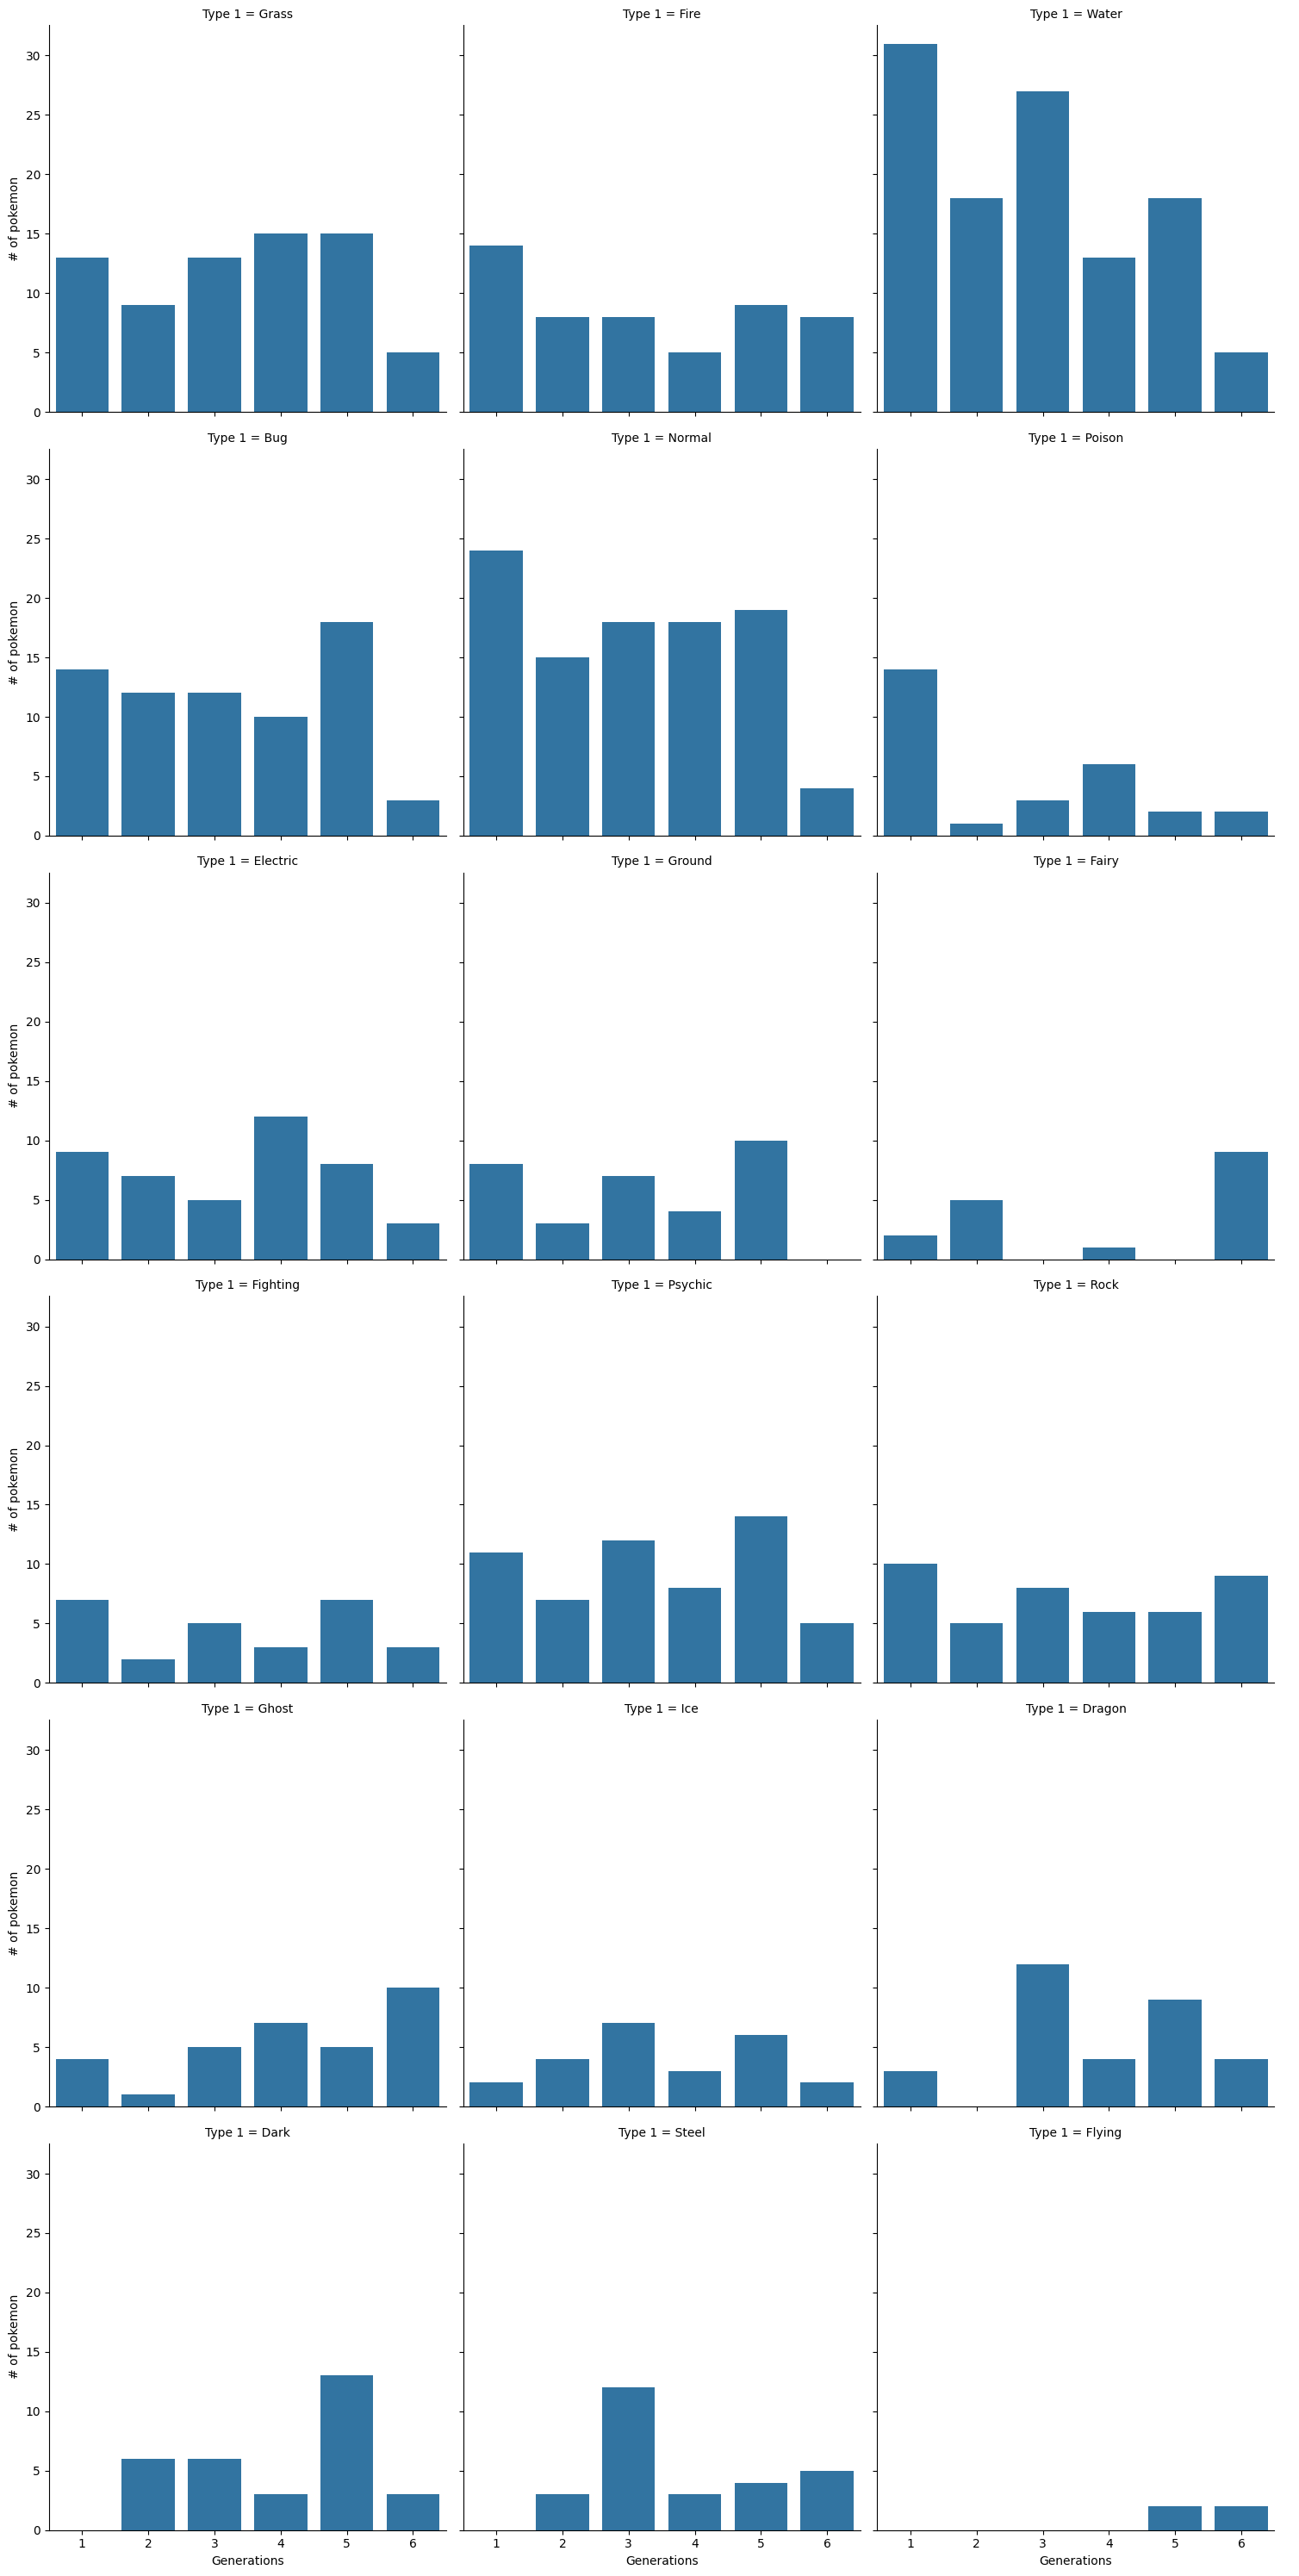

In [13]:
sns.catplot(x='Generation', data=df, col='Type 1', kind='count', col_wrap=3).set_axis_labels('Generations','# of pokemon')

In [14]:
gen= df.groupby(['Generation', 'Type 1']).size().reset_index(name='counts')

In [31]:
gen[gen.Generation==1]

,Generation,Type 1,counts
0,1,Bug,14
1,1,Dragon,3
2,1,Electric,9
3,1,Fairy,2
4,1,Fighting,7
5,1,Fire,14
6,1,Ghost,4
7,1,Grass,13
8,1,Ground,8
9,1,Ice,2


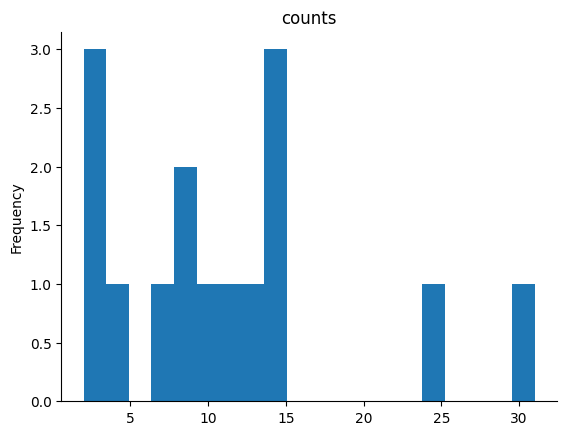

In [32]:
from matplotlib import pyplot as plt
_df_16['counts'].plot(kind='hist', bins=20, title='counts')
plt.gca().spines[['top', 'right',]].set_visible(False)

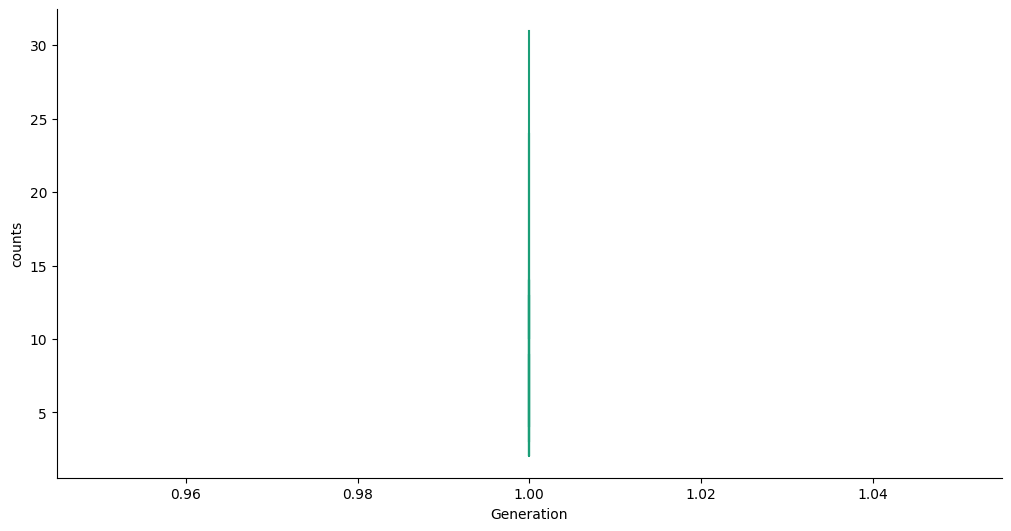

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Generation']
  ys = series['counts']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_17.sort_values('Generation', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Generation')
_ = plt.ylabel('counts')

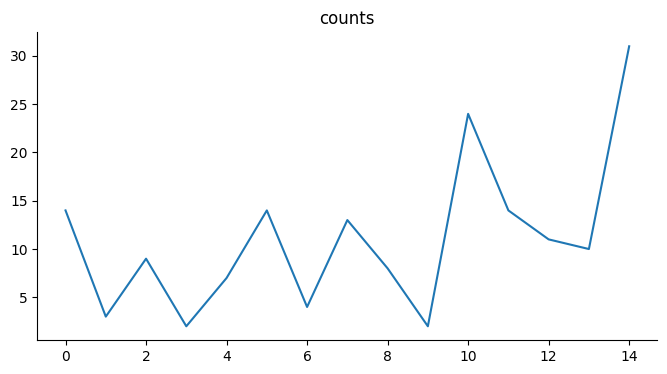

In [26]:
from matplotlib import pyplot as plt
_df_3['counts'].plot(kind='line', figsize=(8, 4), title='counts')
plt.gca().spines[['top', 'right']].set_visible(False)

In [27]:
df1=df[df.Legendary==True]

In [33]:
df1.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,counts
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,470.215385,637.384615,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615,3.769231,47.430769
std,173.651095,60.937389,21.722164,30.348037,28.255131,31.104608,28.827004,22.952323,1.455262,24.074084
min,144.000000,580.000000,50.000000,50.000000,20.000000,50.000000,20.000000,50.000000,1.000000,4.000000
25%,381.000000,580.000000,80.000000,100.000000,90.000000,100.000000,90.000000,90.000000,3.000000,32.000000
50%,483.000000,600.000000,91.000000,110.000000,100.000000,120.000000,100.000000,100.000000,4.000000,44.000000
75%,642.000000,680.000000,105.000000,131.000000,115.000000,150.000000,120.000000,110.000000,5.000000,57.000000
max,721.000000,780.000000,150.000000,190.000000,200.000000,194.000000,200.000000,180.000000,6.000000,112.000000


In [34]:
df1.Generation.value_counts()

Generation
3    18
5    15
4    13
6     8
1     6
2     5
Name: count, dtype: int64

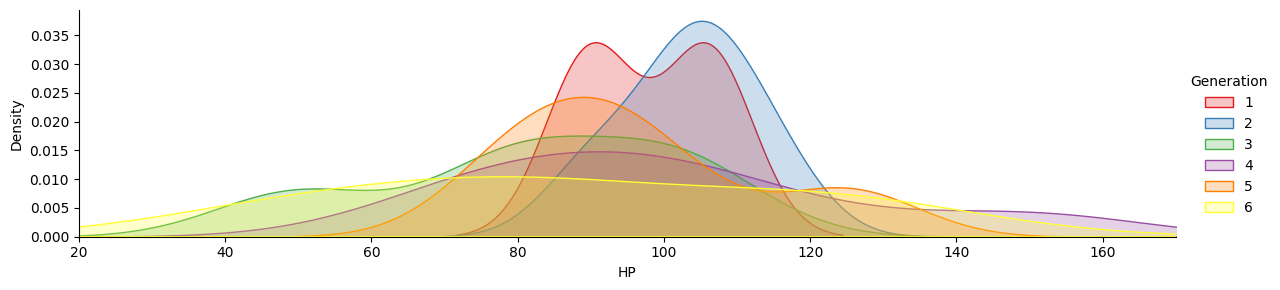

In [35]:
# Assuming df1 is your DataFrame and it includes 'Generation' and 'HP' columns
ax = sns.FacetGrid(df1, hue='Generation', aspect=4, palette='Set1')
ax.map(sns.kdeplot, 'HP', shade=True)
ax.set(xlim=(20, 170))
ax.add_legend()

plt.show()

In [36]:
print(df.columns)

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'counts'],
      dtype='object')


In [37]:
df2 = df[df['Legendary'] == False]

<Axes: xlabel='Type 1', ylabel='Attack'>

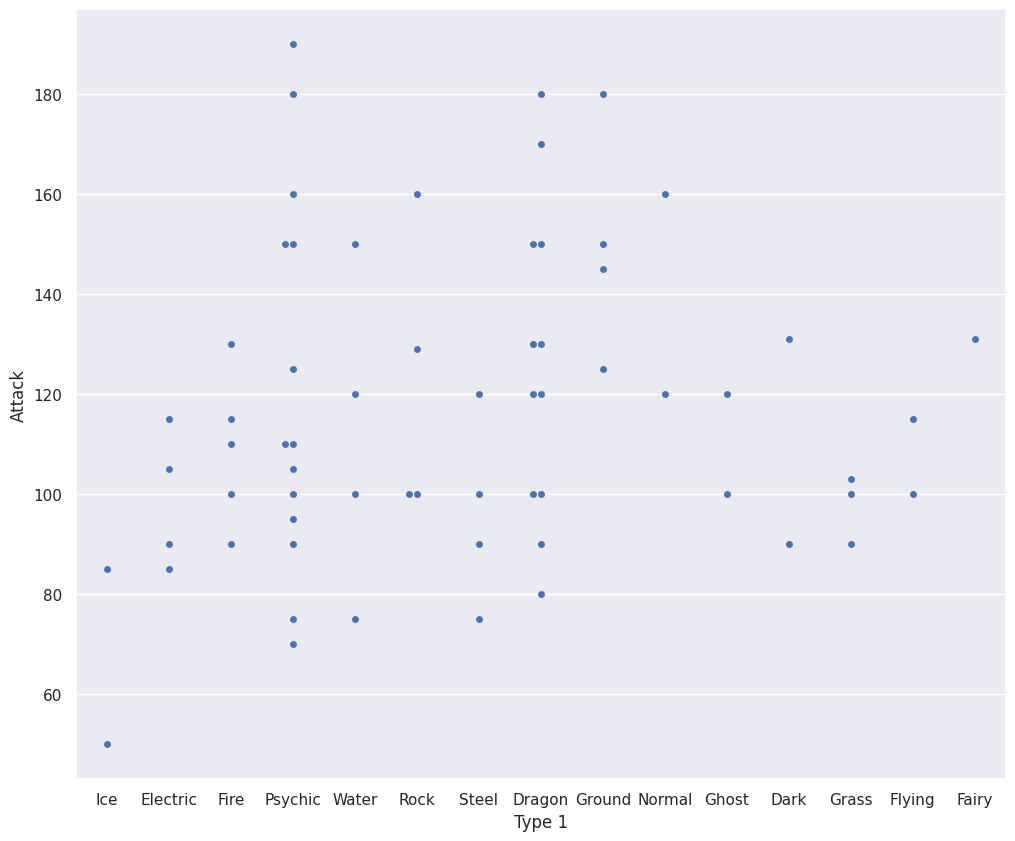

In [38]:
sns.set(rc={'figure.figsize':(12,10)})
sns.swarmplot(x='Type 1', y='Attack', data=df1)

<Axes: xlabel='Type 1', ylabel='Attack'>

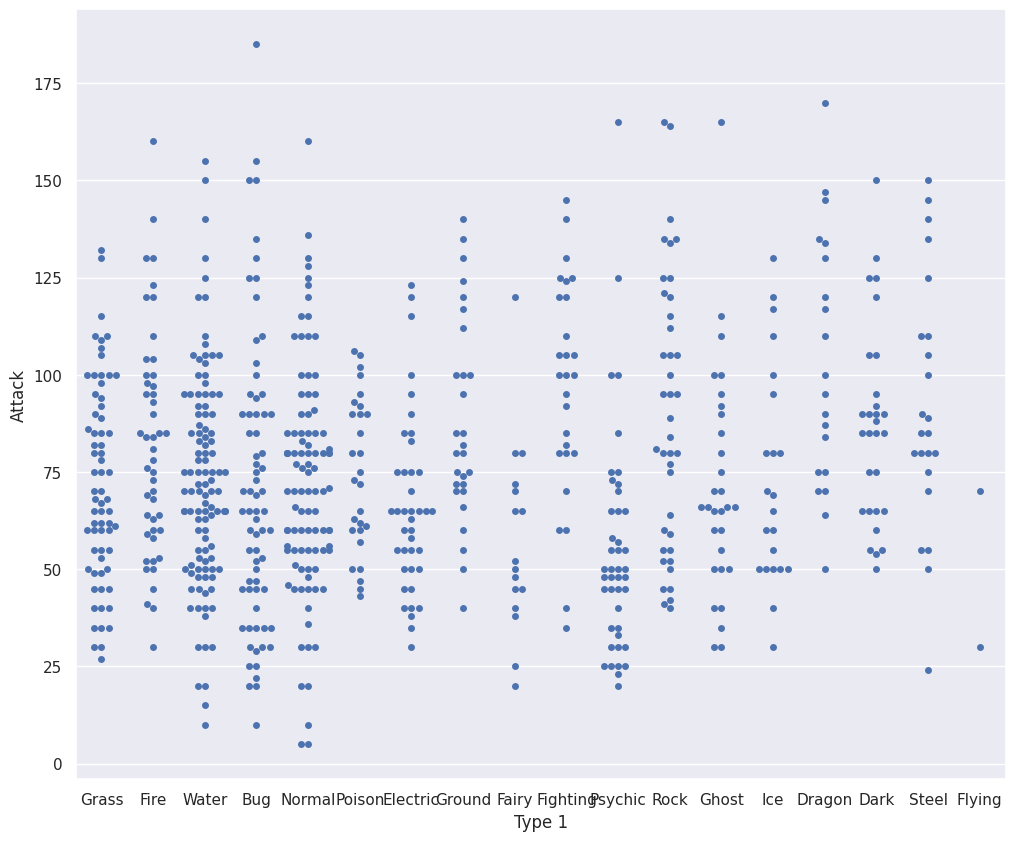

In [39]:
sns.swarmplot(x='Type 1', y='Attack', data=df2)

In [40]:
!pip install mlflow

In [41]:
import mlflow

In [42]:
!pip install pycaret[full]

In [43]:
from pycaret.clustering import setup

# Assuming df is your DataFrame and all necessary libraries are installed
clu1 = setup(data=df, ignore_features=['Type 2'], session_id=123, log_experiment=True, experiment_name='Pokem')

,Description,Value
0,Session id,123
1,Original data shape,"(800, 14)"
2,Transformed data shape,"(800, 829)"
3,Ignore features,1
4,Numeric features,10
5,Categorical features,2
6,Rows with missing values,48.2%
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


2024/06/01 16:18:10 INFO mlflow.tracking.fluent: Experiment with name 'Pokem' does not exist. Creating a new experiment.


In [45]:
from pycaret.classification import *
from pycaret.regression import *

In [48]:
from pycaret.classification import models

# Now you can list available models
available_models = models()
print(available_models)

                                     Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
xgboost         Extreme Gradient Boosting   
lightgbm  Light Gradient Boosting Machine   
catboost              CatBoost Classifier   
dummy                    Dummy Classifier   

                                                  Refe

In [50]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


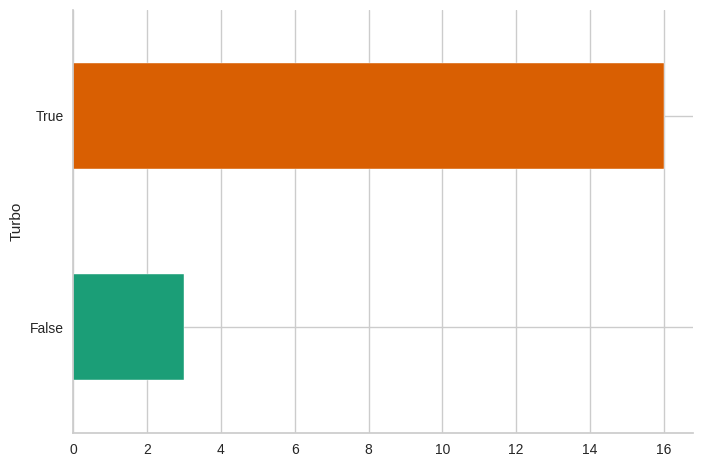

In [51]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_20.groupby('Turbo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [56]:
from pycaret.clustering import create_model

# Model creation
kmeans = create_model('kmeans', num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2927,583.4660,1.1876,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [58]:
kmodes = create_model('kmodes', num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0551,43.2092,4.9728,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [62]:
from pycaret.clustering import assign_model

kmeans_result = assign_model(kmeans)
kmeans_result.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,counts,Cluster
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,70,Cluster 3
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,70,Cluster 3
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,70,Cluster 1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,70,Cluster 1
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,52,Cluster 3


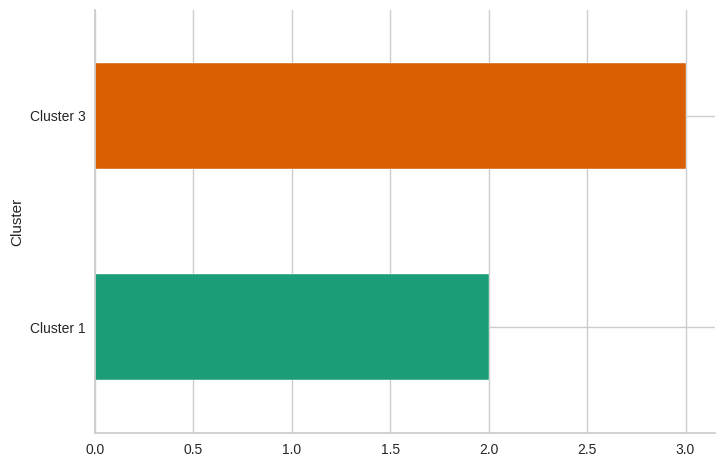

In [63]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_25.groupby('Cluster').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

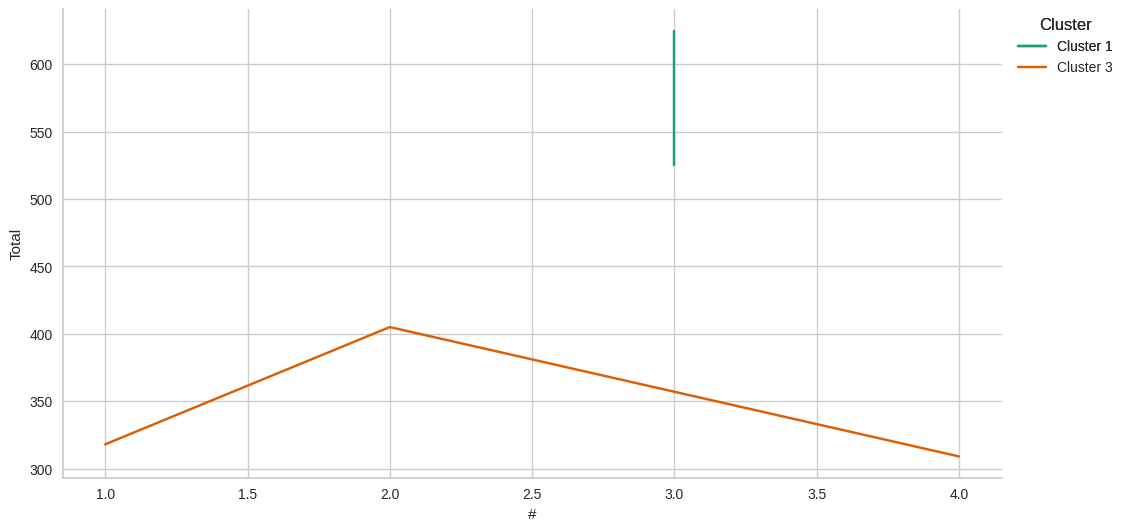

In [64]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['#']
  ys = series['Total']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_30.sort_values('#', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Cluster')):
  _plot_series(series, series_name, i)
  fig.legend(title='Cluster', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('#')
_ = plt.ylabel('Total')

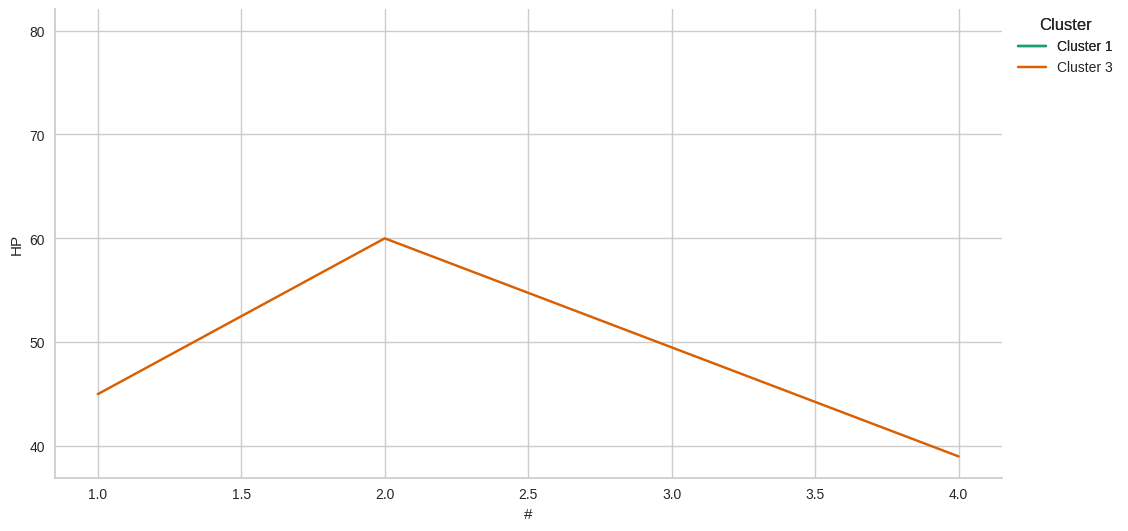

In [65]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['#']
  ys = series['HP']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_31.sort_values('#', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Cluster')):
  _plot_series(series, series_name, i)
  fig.legend(title='Cluster', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('#')
_ = plt.ylabel('HP')

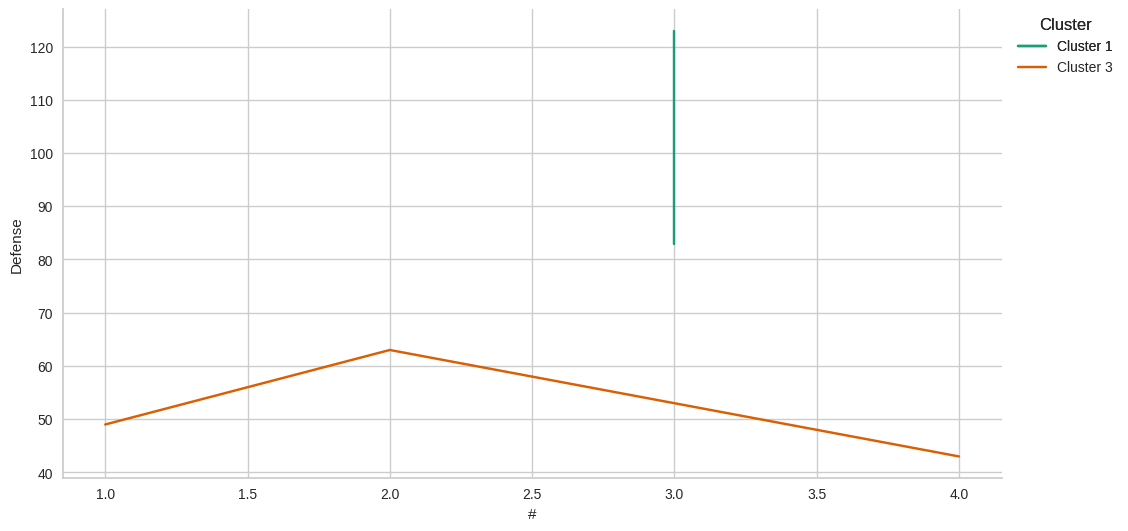

In [66]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['#']
  ys = series['Defense']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_33.sort_values('#', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Cluster')):
  _plot_series(series, series_name, i)
  fig.legend(title='Cluster', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('#')
_ = plt.ylabel('Defense')

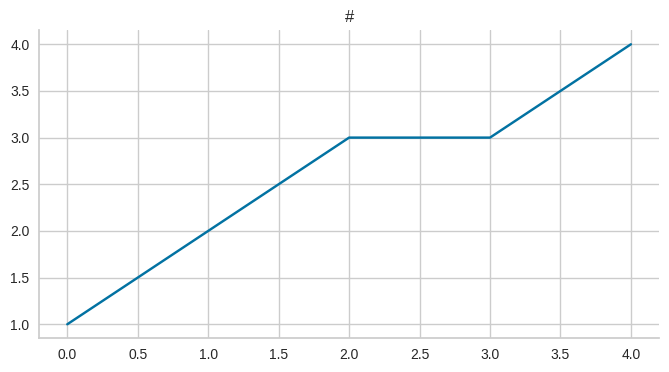

In [67]:
from matplotlib import pyplot as plt
_df_34['#'].plot(kind='line', figsize=(8, 4), title='#')
plt.gca().spines[['top', 'right']].set_visible(False)

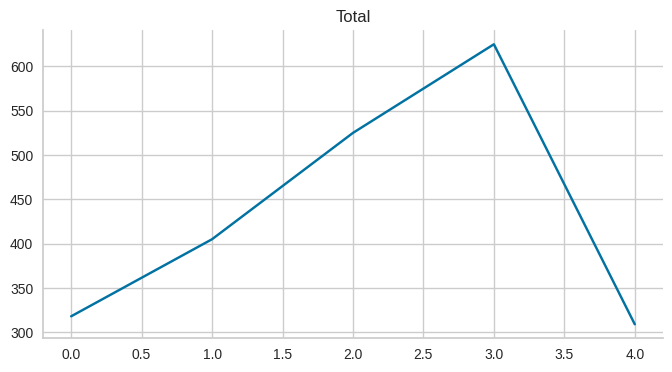

In [68]:
from matplotlib import pyplot as plt
_df_35['Total'].plot(kind='line', figsize=(8, 4), title='Total')
plt.gca().spines[['top', 'right']].set_visible(False)

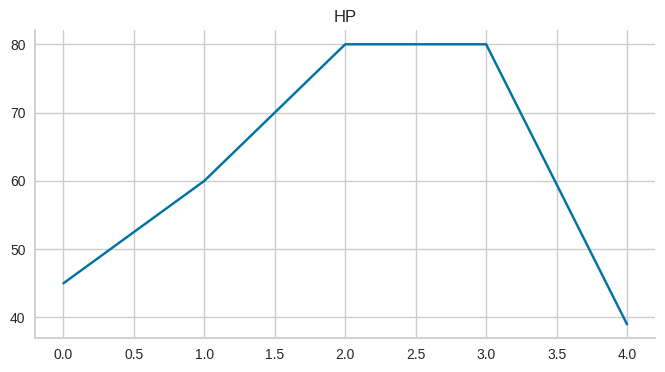

In [69]:
from matplotlib import pyplot as plt
_df_36['HP'].plot(kind='line', figsize=(8, 4), title='HP')
plt.gca().spines[['top', 'right']].set_visible(False)

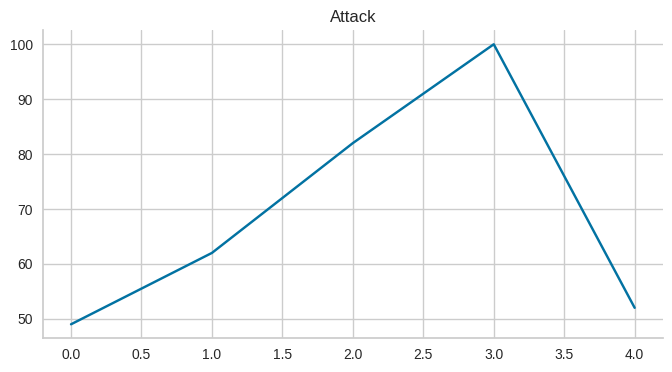

In [70]:
from matplotlib import pyplot as plt
_df_37['Attack'].plot(kind='line', figsize=(8, 4), title='Attack')
plt.gca().spines[['top', 'right']].set_visible(False)

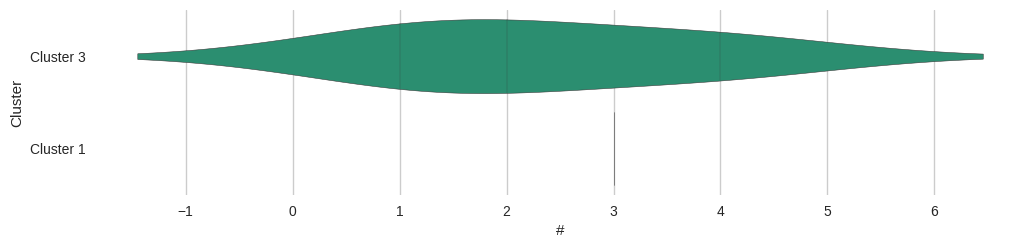

In [71]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_38['Cluster'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_38, x='#', y='Cluster', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

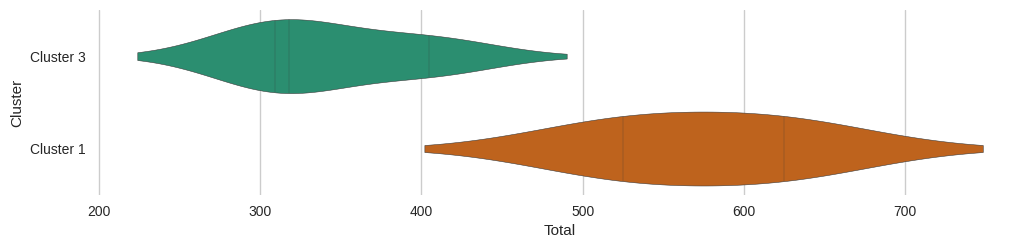

In [72]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_39['Cluster'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_39, x='Total', y='Cluster', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

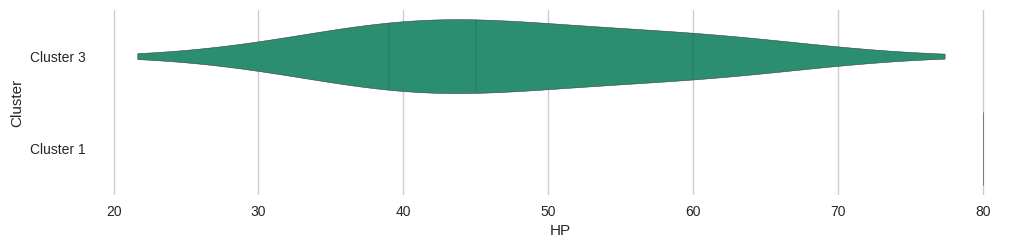

In [73]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_40['Cluster'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_40, x='HP', y='Cluster', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

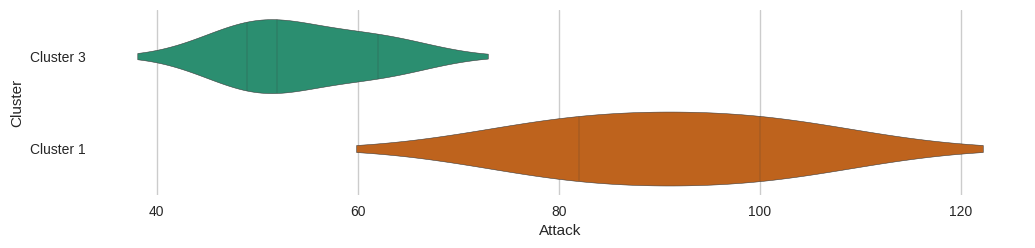

In [74]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_41['Cluster'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_41, x='Attack', y='Cluster', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [77]:
kmodes_results = assign_model(kmodes)
kmodes_results.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,counts,Cluster
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,70,Cluster 2
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,70,Cluster 2
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,70,Cluster 1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,70,Cluster 1
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,52,Cluster 0


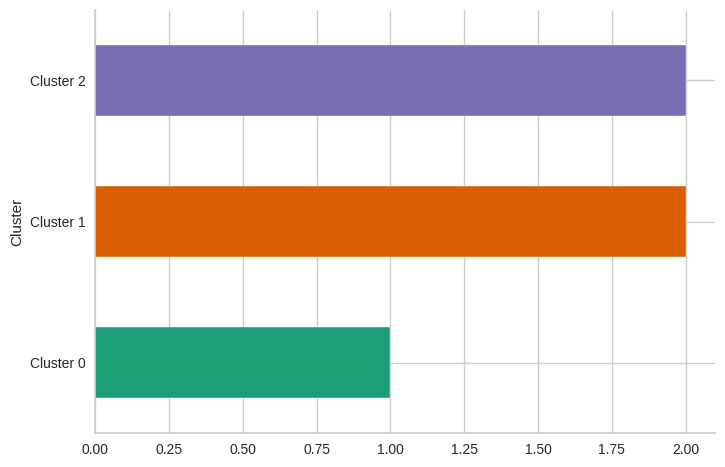

In [78]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_46.groupby('Cluster').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [84]:
from pycaret.classification import setup, create_model, predict_model

# Assuming 'df' is your main DataFrame and 'df1' is the DataFrame you want to predict
clf = setup(data=df, target='Legendary')

# Create a logistic regression model
model = create_model('lr')

# Using the model for prediction on new data
predictions = predict_model(model, data=df1)
print(predictions.head())

,Description,Value
0,Session id,2571
1,Target,Legendary
2,Target type,Binary
3,Original data shape,"(800, 14)"
4,Transformed data shape,"(800, 48)"
5,Transformed train set shape,"(560, 48)"
6,Transformed test set shape,"(240, 48)"
7,Numeric features,10
8,Categorical features,3
9,Rows with missing values,48.2%


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9286,0.9808,0.5000,0.5000,0.5000,0.4615,0.4615
1,0.9643,0.9615,0.5000,1.0000,0.6667,0.6500,0.6939
2,0.9643,0.9712,0.7500,0.7500,0.7500,0.7308,0.7308
3,0.9464,0.9904,0.2500,1.0000,0.4000,0.3824,0.4862
4,0.9821,0.9856,0.7500,1.0000,0.8571,0.8478,0.8578
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9286,0.9804,0.6000,0.6000,0.6000,0.5608,0.5608
7,0.9643,0.9882,0.6000,1.0000,0.7500,0.7321,0.7598
8,0.9464,0.9843,0.6000,0.7500,0.6667,0.6379,0.6426


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7231,0,0.7231,1.0000,0.8393,0.0000,0.0000


       #                 Name    Type 1    Type 2  Total   HP  Attack  \
156  144             Articuno       Ice    Flying    580   90      85   
157  145               Zapdos  Electric    Flying    580   90      90   
158  146              Moltres      Fire    Flying    580   90     100   
162  150               Mewtwo   Psychic       NaN    680  106     110   
163  150  MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190   

     Defense  Sp. Atk  Sp. Def  Speed  Generation  counts  Legendary  \
156      100       95      125     85           1      24       True   
157       85      125       90    100           1      44       True   
158       90      125       85     90           1      52       True   
162       90      154       90    130           1      57       True   
163      100      154      100    130           1      57       True   

     prediction_label  prediction_score  
156                 0            0.5068  
157                 0            0.5943  
15

In [90]:
from pycaret.clustering import setup, create_model, plot_model

# Assuming 'df' is your DataFrame
clu_setup = setup(data=df, normalize=True, session_id=123)

# Assuming you create or have a KMeans model
kmeans = create_model('kmeans', num_clusters=4)

# Now you can plot the model
plot_model(kmeans)

,Description,Value
0,Session id,123
1,Original data shape,"(800, 14)"
2,Transformed data shape,"(800, 847)"
3,Numeric features,10
4,Categorical features,3
5,Rows with missing values,48.2%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0013,2.2409,13.0240,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

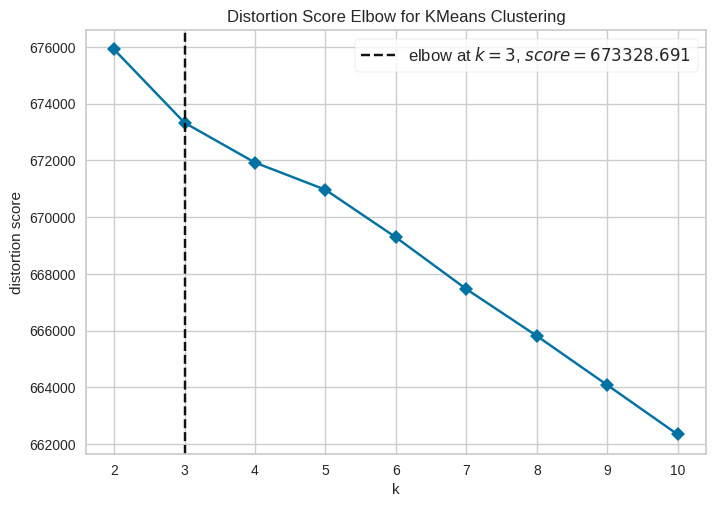

In [91]:
plot_model(kmeans, plot='elbow')

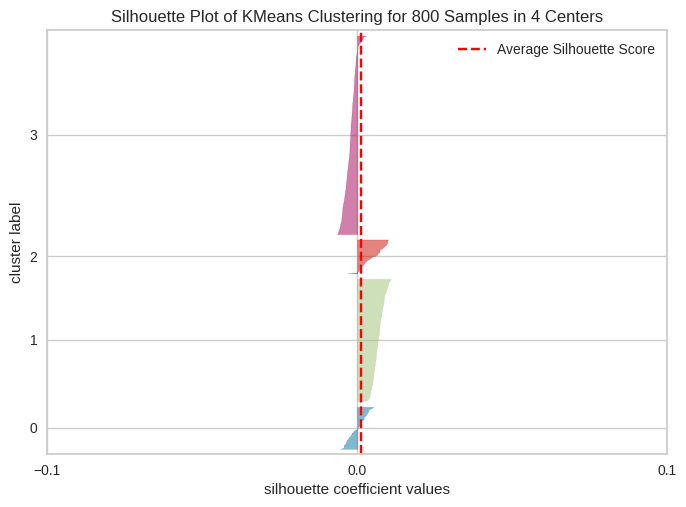

In [92]:
plot_model(kmeans, plot= 'silhouette')

In [93]:
plot_model(kmeans, plot='distribution')

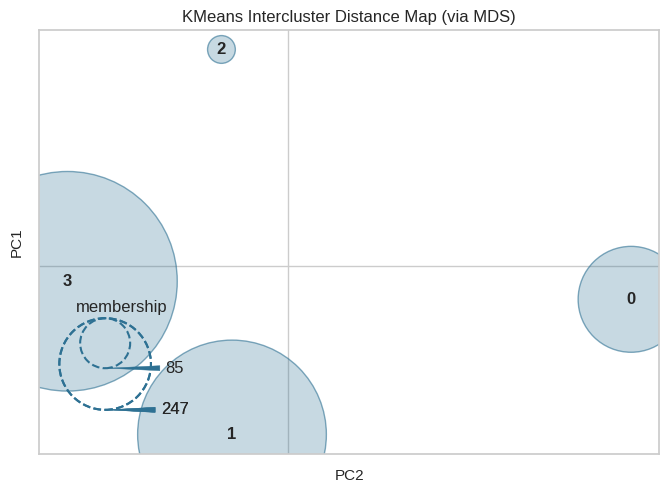

In [94]:
plot_model(kmeans, plot='distance')

In [95]:
plot_model(kmeans, plot='distribution', feature='Generation')

In [96]:
plot_model(kmeans, plot='distribution', feature='Legendary')

In [98]:
from pycaret.clustering import setup, create_model, save_model

# Assuming 'df' is your DataFrame
clu_setup = setup(data=df, session_id=123)

# Create the KMeans model
kmeans = create_model('kmeans', num_clusters=4)

# Now attempt to save the model
save_model(kmeans, 'Clu1')

,Description,Value
0,Session id,123
1,Original data shape,"(800, 14)"
2,Transformed data shape,"(800, 847)"
3,Numeric features,10
4,Categorical features,3
5,Rows with missing values,48.2%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2927,583.4660,1.1876,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['#', 'Total', 'HP', 'Attack',
                                              'Defense', 'Sp. Atk', 'Sp. Def',
                                              'Speed', 'Generation', 'counts'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer'...
                                     include=['Name', 'Type 1', 'Type 2'],
                       